In [2]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 

#paths
savefigpath  = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\2024-02-29'
'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

Env: clapfcstimulation


Sensory - Total animal number for 5
Opto-boosted - Total animal number for 5
Opto - Total animal number for 0
All - Total animal number for 5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ Absolute magnitude - Total animal number for 5
[0.015425453939888143, 0.001355553248782306]


c:\Users\Huriye\Documents\code\clapfcstimulation\plot_funcs.py:680: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.swarmplot(data=diff_df, x='Condition', y='Difference', palette= colorpalet, ax = ax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ ECDF Shift - Total animal number for 5
[0.0043821061762448306, 0.0017399482134249516]


c:\Users\Huriye\Documents\code\clapfcstimulation\plot_funcs.py:680: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.swarmplot(data=diff_df, x='Condition', y='Difference', palette= colorpalet, ax = ax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'ax_gs_exampleTrainingSession' is not defined

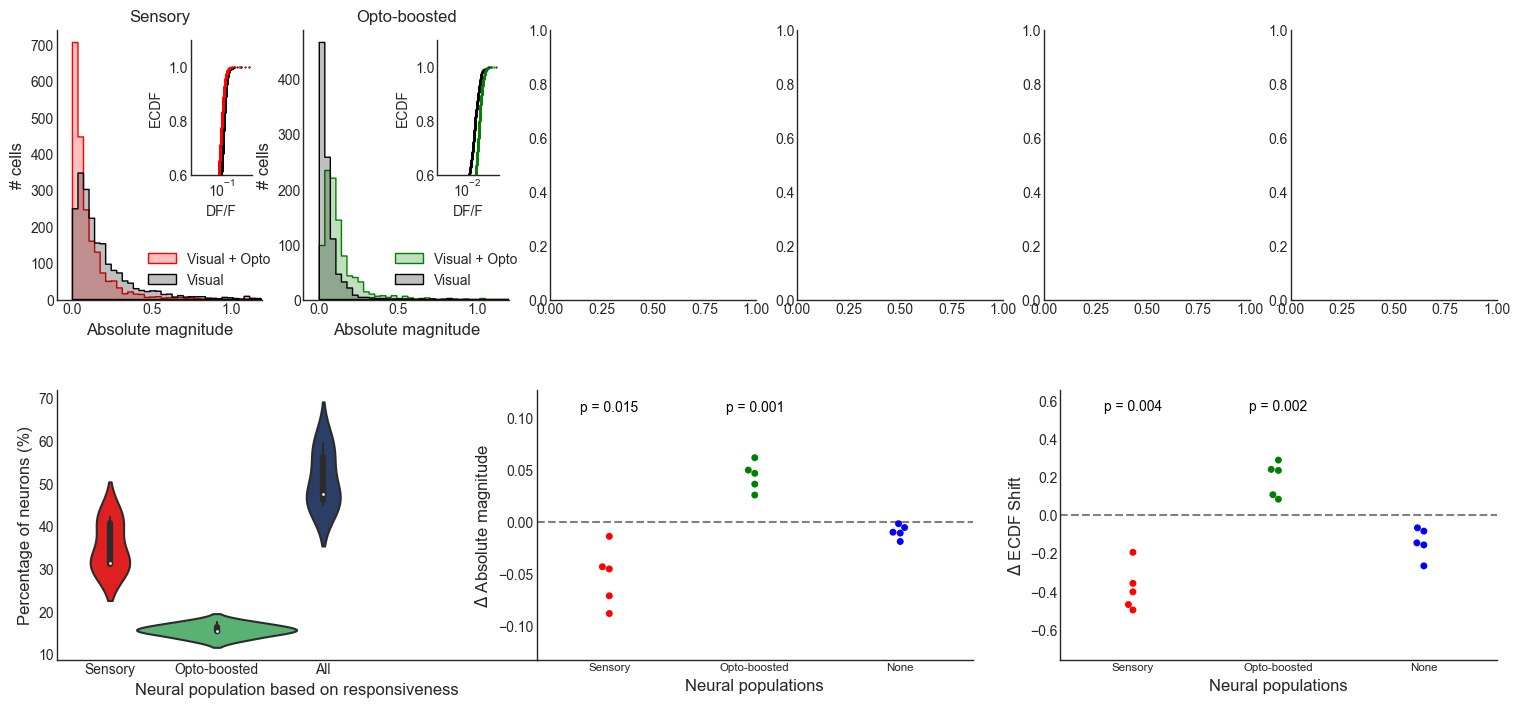

In [7]:
# Figure 3 : Chrimson mice - TRAINED population analysis
interestedCohort = 'NAAP'
interestedTrainedLevel = 'Naive'
plotParams = {
    'ylimitsforhist': [0, 750],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.6, 1.1],
    'xlimitsforABS': [-0.1, 1.2],
    'xlimitsforCV': [-3, 3],
    'faceColors': ['black','red'],
            }

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspecs
gs_exampleCellTraces    = fig.add_gridspec(ncols=1, nrows=3, bottom=0.75, top=0.95, left=0.65,right=0.95,
                              wspace=0.1, hspace=0.2)

gs_histograms           = fig.add_gridspec(ncols=6, nrows=1, bottom=0.55, top=0.70, left=0.05, right=0.95,
                              wspace=0.2, hspace=0.4)

gs_cellRatios           = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.50, left=0.05, right=0.35,
                              wspace=0.2, hspace=0.2)

gs_Summary               = fig.add_gridspec(ncols=2, nrows=1, bottom=0.35, top=0.50, left=0.35, right=0.95, 
                              wspace=0.2, hspace=0.2)


# Panel C: Example cell traces
total_num_axis = gs_exampleCellTraces.get_geometry()[0]* gs_exampleCellTraces.get_geometry()[1]
#ax_gs_exampleTrainingSession = {xx: fig.add_subplot(gs_exampleCellTraces[xx]) for xx in range(total_num_axis)}


# Panel D-I : Histograms of magnitude of responses
total_num_axis = gs_histograms.get_geometry()[0]* gs_histograms.get_geometry()[1]
ax_gs_magnitudeHist = {xx: fig.add_subplot(gs_histograms[xx]) for xx in range(total_num_axis)}

pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Sensory',
                    plotParams = None,axisAll=ax_gs_magnitudeHist[0])
plotParams['faceColors'] = ['black', 'green']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto-boosted',
                    plotParams = plotParams,axisAll=ax_gs_magnitudeHist[1])



# Panel J: Magnitude of responses
total_num_axis = gs_cellRatios.get_geometry()[0]* gs_cellRatios.get_geometry()[1]
ax_gs_cellRatios = {xx: fig.add_subplot(gs_cellRatios[xx]) for xx in range(total_num_axis)}
pfun.plot_cellRatiosPerAnimal('All', [interestedCohort], ['Naive'], ax=ax_gs_cellRatios[0], 
                              savefigname=None, savefigpath=None)


# Panel I-J: Summary
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], ['Naive'], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('ECDF Shift',  [interestedCohort], ['Naive'], ax= ax_gs_Summary[1], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_exampleTrainingSession, ax_gs_magnitudeHist, ax_gs_cellRatios, ax_gs_Summary]
labels = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
            'Q','R','S','T','U','V','W','X','Y','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<3:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>2:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
savefigname = 'Figure4_Chrimson_TrainedPopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


Number of responsive cells:  9287


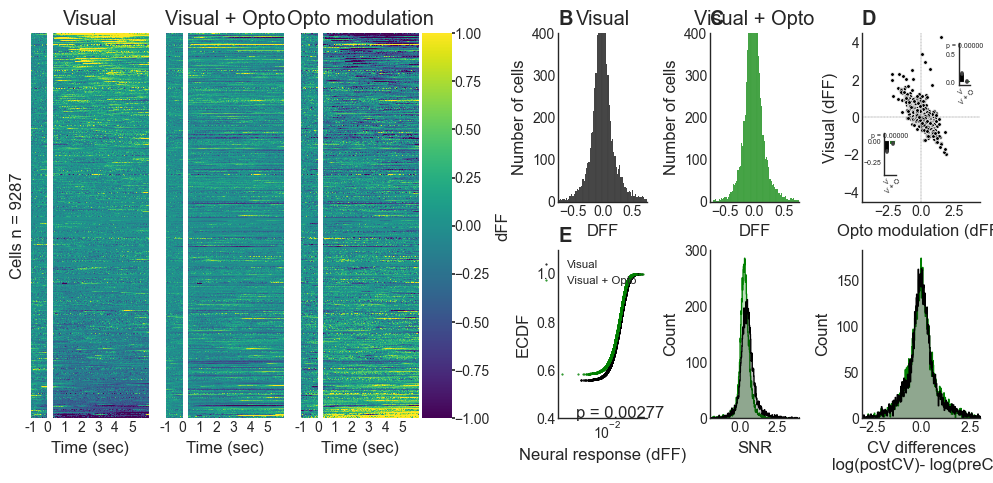

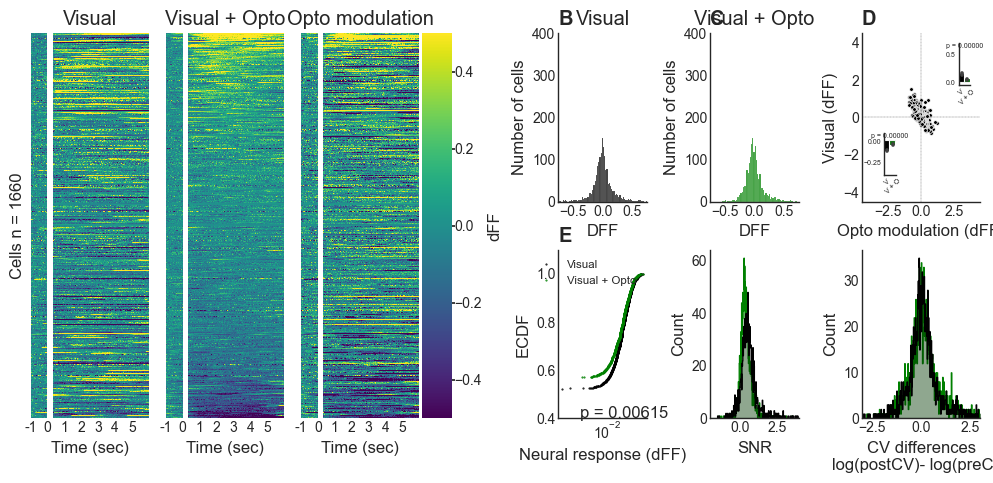

In [17]:
# Figure 2:
savefigpath  = 'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\' 
ylimitsforhist = [0, 400]
xlimitsforhist = [-0.75, 0.75]
analysis_time = 1500 # in ms
colorbarlimitsForHeatMap = [-1,1] 
scatterplotlimits = [-4.5, 4.5]
xlimitsforSNR = [-2, 4]
xlimitsforCV = [-3, 3]

condition  ='Naive'
cohort     = 'Chrimson'
colormap   = 'viridis' # None
cellresponsiveness = 'Opto'
violinFaceColors = ['black', 'green']

responsiveCells = mfun.selectInterestedcells ( cohort, condition, responsive = cellresponsiveness, plotValues = False, pupil = False )
print('Number of responsive cells: ', str(np.sum(responsiveCells)))
# sort based on visual response
dff_meanVis1sec = np.nanmean(dff_traceVis[:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis=1)
savefigname = 'Figure2-Panel1_' + cohort + condition + cellresponsiveness
pfun.population_plots(responsiveCells, dff_traceVis, dff_traceBoth, dff_meanVis1sec,
                    analysis_time, colormap,
                    ylimitsforhist,xlimitsforhist,
                    violinFaceColors,colorbarlimitsForHeatMap,scatterplotlimits,
                    xlimitsforSNR, xlimitsforCV,
                    savefigname =savefigname ,savefigpath = savefigpath )

############################################################################################################
condition  = 'Trained'
cohort     = 'Chrimson'
colormap   =  'viridis' # 'cividis'
cellresponsiveness = 'Opto'

violinFaceColors = ['black', 'green']
colorbarlimitsForHeatMap = [-0.5,0.5] 
responsiveCells = mfun.selectInterestedcells ( cohort, condition, responsive = cellresponsiveness, plotValues = False, pupil = False )
# sort based on BOTH response
dff_meanVis1sec = np.nanmean(dff_traceBoth[:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis=1)
savefigname = 'Figure2_Panel2_' + cohort + condition + cellresponsiveness
pfun.population_plots(responsiveCells, dff_traceVis, dff_traceBoth, dff_meanVis1sec,
                    analysis_time, colormap,
                    ylimitsforhist,xlimitsforhist,
                    violinFaceColors,colorbarlimitsForHeatMap,scatterplotlimits,
                    xlimitsforSNR, xlimitsforCV,
                    savefigname =savefigname ,savefigpath = savefigpath )



c:\Users\Huriye\Documents\code\clapfcstimulation\main_funcs.py:292: RuntimeWarning: All-NaN slice encountered
  selectedQuality = (np.nanmin(dff_traceOpto[:,87:90], axis=1)>-0.85) & (np.nanmax(dff_traceOpto[:, 87:90], axis=1)<0.85)
c:\Users\Huriye\Documents\code\clapfcstimulation\main_funcs.py:292: RuntimeWarning: All-NaN slice encountered
  selectedQuality = (np.nanmin(dff_traceOpto[:,87:90], axis=1)>-0.85) & (np.nanmax(dff_traceOpto[:, 87:90], axis=1)<0.85)
c:\Users\Huriye\Documents\code\clapfcstimulation\main_funcs.py:292: RuntimeWarning: All-NaN slice encountered
  selectedQuality = (np.nanmin(dff_traceOpto[:,87:90], axis=1)>-0.85) & (np.nanmax(dff_traceOpto[:, 87:90], axis=1)<0.85)
c:\Users\Huriye\Documents\code\clapfcstimulation\main_funcs.py:292: RuntimeWarning: All-NaN slice encountered
  selectedQuality = (np.nanmin(dff_traceOpto[:,87:90], axis=1)>-0.85) & (np.nanmax(dff_traceOpto[:, 87:90], axis=1)<0.85)
c:\Users\Huriye\Documents\code\clapfcstimulation\main_funcs.py:292: Runt

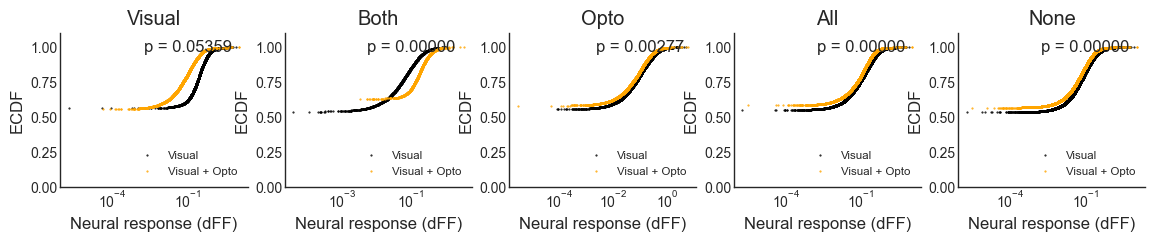

In [5]:
# Plot ECDF
#parameters
fRate = 1000/30.0
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysis_time = 1500.0 # in ms
analysis_frame = int(np.ceil(analysis_time/fRate))
simulationDur_ms = 350.0 # in ms
simulationDur = int(np.ceil(simulationDur_ms/fRate))

pfun.set_figure()
fig = plt.figure(figsize=(14, 2))
condition = ['Naive']#, 'Trained']
cohorts = ['Chrimson']#, 'OPN3']
colormap = ['cividis', None, 'viridis', 'vlag', 'plasma', 'inferno', 'magma' ]

for cond in condition:
    for cohort in cohorts:
        coloridx = 0
        for idx, cellresponsiveness in enumerate(['Visual', 'Both', 'Opto', 'All', 'None']):
            responsiveCells = mfun.selectInterestedcells ( cohort, cond, responsive = cellresponsiveness, plotValues = False, pupil = False )
            plt.subplot(1,5,idx+1)

            responses_before = np.nanmean(dff_traceVis[responsiveCells, pre_frames:(pre_frames + simulationDur + analysis_frame)], axis=1)
            x, y = mfun.ecdf(responses_before)

            plt.plot(x, y, marker='.', markersize=1, color = 'black', linestyle='none',label='Visual')

            responses_after =  np.nanmean(dff_traceBoth[responsiveCells, pre_frames:(pre_frames + simulationDur + analysis_frame)], axis=1)
            x, y = mfun.ecdf(responses_after)
            plt.plot(x, y, marker='.', markersize=1, color = 'orange', linestyle='none',label='Visual + Opto')
            plt.annotate('p = {:.5f}'.format(stats.wilcoxon(responses_before, responses_after)[1], 3),  
                    xy=(0.1, 1.05), xytext=(0, 0), textcoords='offset points', 
                    ha = 'center', va = 'top')

            plt.xlabel('Neural response (dFF)')
            plt.ylabel('ECDF')
            if colormap is None:
                plt.ylim(0, 1.1)
            plt.ylim(0, 1.1)
            #plt.grid(True)
            plt.xscale('log') 
            plt.legend(fontsize='x-small',loc='lower right', frameon=False)
            plt.title(cellresponsiveness)
savefigname = 'Figure5-Panel3_ECDFs'
pfun.save_figure(savefigname,savefigpath)


In [ ]:
responsiveCells = mfun.selectInterestedcells ( 'Chrimson', 'Naive', responsive = 'Both', plotValues = False, pupil = False )
datasets = [dff_traceVis, dff_traceOpto, dff_traceBoth]
labels = ['Visual', 'Both']

infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlotting_moreStats.pkl'
varianceBoth_pre, varianceVis_pre, varianceOpto_pre, varianceBoth_post, varianceVis_post, varianceOpto_post, snrBoth,snrVis,snrOpto,ccBoth,ccVis,ccOpto  = pd.read_pickle(infoPath) 

labels = ['Visual', 'Both']

cv_values = []

# Calculate SNR and store results in mi_values
indices = np.where(responsiveCells == True)[0]
for data, label in zip(datasets, labels):
  if label == 'Visual':  # Get the first element of the tuple, which is the array of indices
    snr = [snrVis[i] for i in indices]
    cc = [ccVis[i] for i in indices]
    varianceDiff = [post - pre for post, pre in zip(varianceVis_post, varianceVis_pre)]
    variance = [varianceDiff[i] for i in indices]
  elif label == 'Both':
    snr = [snrBoth[i] for i in indices]
    cc = [ccBoth[i] for i in indices]
    varianceDiff = [post - pre for post, pre in zip(varianceBoth_post, varianceBoth_pre)]
    variance = [varianceDiff[i] for i in indices]

  # Append the results to the list
  for value in variance:  # Assuming snr is a numpy array or list
    cv_values.append({'Condition': label, 'CV': value})

cv_df = pd.DataFrame(cv_values)

# Plot histogram
FaceColors = ['black', 'red', 'darkred']
bin_width = 0.02 # You can adjust the width of the bins as needed
bins = np.arange(-5,5 + bin_width, bin_width)

sns.histplot(data=cv_df, x="CV", hue="Condition", element="step", palette=FaceColors, bins=bins)
plt.xlabel("SNR")
plt.ylabel("Number of cells ")
plt.legend(labels, fontsize='x-small',loc='upper right', frameon=False)
#plt.ylim(0, 1000)
#plt.xlabel("Condition")
#plt.ylabel("CV")
plt.show()




In [ ]:
# Mutual Information - Not working

datasets = [dff_traceVis, dff_traceOpto, dff_traceBoth]
labels = ['Visual', 'Opto', 'Both']
analysis_frame = analysis_time
mi_values = []

# Calculate SNR and store results in mi_values
for data, label in zip(datasets, labels):
    # Define your actual responsiveCells and frame indices here
    response_before = np.nanmean(data[responsiveCells, (pre_frames - analysis_frame):pre_frames], axis=1)
    response_after = np.nanmean(data[responsiveCells, (pre_frames + simulationDur):(pre_frames + simulationDur + analysis_frame)], axis=1)
    
    # Use the custom calculate_SNR function
    num_trials = response_before.shape[0]
    stimuli = np.concatenate([
                np.zeros(num_trials),  # Labels for visual condition
                np.ones(num_trials),   # Labels for pre-visual (no) condition
            ])
    responses = np.concatenate([response_after, response_before])
    mi = mfun.calculate_mutual_information(stimuli, responses.flatten())
    # Append the results to the list
    mi_values.append({'Condition': label, 'SNR': mi})

# Convert the list of dictionaries to a Pandas DataFrame
mi_df = pd.DataFrame(mi_values)

# Create a violin plot
sns.set(style="whitegrid")
sns.barplot(x="Condition", y="SNR", data=mi_df, palette="muted")
plt.title("Coefficient of Variation")
plt.xlabel("Condition")
plt.ylabel("CV")
plt.show()


In [ ]:
# DECODING analysis

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc

# Assuming responsiveCells, dff_traceVis, dff_traceBoth are defined as before
responsiveCells = mfun.selectInterestedcells ( 'Chrimson', 'Naive', responsive = 'Opto', plotValues = False, pupil = False )
# 1. Prepare the data
# Flatten the neural data into two-dimensional arrays (n_samples x n_features)
analysis_time = 1500
pre_frames = 70
X_before = dff_traceVis[responsiveCells, pre_frames:(pre_frames + simulationDur + analysis_time)]
# Identify rows with any nan values
# rows_with_nan = np.any(np.isnan(X_before), axis=1)
# X_before_cleaned = X_before[~rows_with_nan]
# X_before = X_before_cleaned
X_after = dff_traceBoth[responsiveCells, pre_frames:(pre_frames+ simulationDur + analysis_time)]
# Identify rows with any nan values
# rows_with_nan = np.any(np.isnan(X_after), axis=1)
# X_after_cleaned = X_after[~rows_with_nan]
# X_after = X_after_cleaned

X = np.vstack([X_before, X_after])  # Stacking data vertically

# Define labels: 0 for 'Before Stimulation' and 1 for 'After Stimulation'
y = np.hstack([np.zeros(X_before.shape[0]), np.ones(X_after.shape[0])])

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a classifier
clf = SVC(kernel='rbf', C=1, gamma='auto')
clf.fit(X_train, y_train)

# 4. Test the classifier
y_pred = clf.predict(X_test)

# 5. Report the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decoding accuracy: {accuracy * 100:.2f}%")

# # Plot Confusion Matrix
# plt.figure()
# plot_confusion_matrix(clf, X_test, y_test, display_labels=['Before Stimulation', 'After Stimulation'], cmap=plt.cm.Blues, normalize='true')
# plt.title("Normalized Confusion Matrix")
# plt.show()

# ROC curve for binary classification
if len(np.unique(y)) == 2:
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()